In [2]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import r2_score as r2, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
from matplotlib import rcParams

In [45]:
matplotlib.rcParams.update({'font.size': 14})

In [69]:
# Загружаем данные

data = pd.read_csv('train.CSV')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [35]:
train, valid = train_test_split(data, test_size=0.2, random_state=42)
train.shape, valid.shape

((8000, 20), (2000, 20))

In [36]:
# проверяем количество пропусков данных

train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1701
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     3852
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [38]:
# Смотрим корреляцию признаков

train.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.022087,0.003722,-0.003885,0.020899,0.023974,-0.003500,-0.007138,0.005628,0.023480,0.004807,0.003250,-0.015044,NaN,0.005596,-0.007629,0.021515
DistrictId,0.022087,1.000000,0.067164,-0.028430,-0.018792,0.037649,-0.123522,-0.150498,0.014961,0.067445,0.243904,0.163341,0.140257,NaN,0.312593,0.176530,0.264687
Rooms,0.003722,0.067164,1.000000,0.683086,0.122181,0.001394,0.000991,-0.034617,-0.011849,-0.028102,0.083350,0.078083,0.010586,NaN,0.068004,0.060453,0.550467
Square,-0.003885,-0.028430,0.683086,1.000000,0.167967,0.006235,0.116500,0.078986,-0.010411,-0.061289,-0.069089,-0.042523,0.016837,NaN,-0.025191,0.012953,0.537633
LifeSquare,0.020899,-0.018792,0.122181,0.167967,1.000000,-0.001120,0.021436,0.026377,-0.002245,-0.021993,-0.044097,-0.036472,0.003908,NaN,-0.022510,-0.011772,0.075584
KitchenSquare,0.023974,0.037649,0.001394,0.006235,-0.001120,1.000000,-0.011803,-0.004612,0.000923,-0.006156,0.037654,0.032290,-0.014224,NaN,0.042789,0.009139,0.023048
Floor,-0.003500,-0.123522,0.000991,0.116500,0.021436,-0.011803,1.000000,0.411140,0.001108,-0.016153,-0.045989,-0.019199,-0.003110,NaN,-0.065566,0.024454,0.129984
HouseFloor,-0.007138,-0.150498,-0.034617,0.078986,0.026377,-0.004612,0.411140,1.000000,-0.000993,-0.005562,-0.024644,0.002014,-0.008007,NaN,-0.071991,0.021821,0.086351
HouseYear,0.005628,0.014961,-0.011849,-0.010411,-0.002245,0.000923,0.001108,-0.000993,1.000000,0.001752,0.003343,0.002179,0.000936,NaN,0.012657,0.004081,0.004829
Ecology_1,0.023480,0.067445,-0.028102,-0.061289,-0.021993,-0.006156,-0.016153,-0.005562,0.001752,1.000000,0.022108,0.005991,-0.119716,NaN,0.029700,-0.076281,-0.061364


In [39]:
# Смотрим данные на предмет аномалий и выбросов

train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8000.000000,8000.000000,8000.000000,8000.000000,6299.000000,8000.00000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,4148.0,8000.000000,8000.000000,8000.000000
mean,8365.521625,50.493625,1.889125,56.267255,37.325501,6.37875,8.492375,12.623250,4.491580e+03,0.117770,24.729125,5358.405125,8.006500,900.0,1.313375,4.246375,214094.178589
std,4865.821409,43.691588,0.839297,20.381827,95.733053,31.84321,5.221240,6.812185,2.241661e+05,0.118239,17.609415,4016.879776,23.720008,0.0,1.489362,4.806018,92671.160116
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.00000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,900.0,0.000000,0.000000,59174.778028
25%,4154.750000,20.000000,1.000000,41.745094,22.797476,1.00000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,900.0,0.000000,1.000000,153996.751273
50%,8369.500000,36.000000,2.000000,52.549663,32.806379,6.00000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.0,1.000000,3.000000,192152.769521
75%,12555.500000,75.000000,2.000000,65.931541,45.048935,9.00000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7287.000000,5.000000,900.0,2.000000,6.000000,249135.462171
max,16796.000000,209.000000,19.000000,604.705972,7480.592129,2014.00000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,900.0,6.000000,23.000000,627525.072788


# Готовим функции для чистки данных

In [40]:
# Заполнение LifeSquare

def lifesquare(df):
    df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'LifeSquare'] = \
    (df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'Square'] - \
    df.loc[(df['Square'] < df['LifeSquare']) | (df['LifeSquare'].isna()), 'KitchenSquare'])*0.65
    return df

In [41]:
train = lifesquare(train)
train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     3852
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [42]:
# Заполняем Healthcare_1

def healthcare_1(df):
    df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df.loc[df['Healthcare_1'].isna() == False, 'Healthcare_1'].median()
    return df

In [43]:
train = healthcare_1(train)
train.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8000 non-null   int64  
 1   DistrictId     8000 non-null   int64  
 2   Rooms          8000 non-null   float64
 3   Square         8000 non-null   float64
 4   LifeSquare     8000 non-null   float64
 5   KitchenSquare  8000 non-null   float64
 6   Floor          8000 non-null   int64  
 7   HouseFloor     8000 non-null   float64
 8   HouseYear      8000 non-null   int64  
 9   Ecology_1      8000 non-null   float64
 10  Ecology_2      8000 non-null   object 
 11  Ecology_3      8000 non-null   object 
 12  Social_1       8000 non-null   int64  
 13  Social_2       8000 non-null   int64  
 14  Social_3       8000 non-null   int64  
 15  Healthcare_1   8000 non-null   float64
 16  Helthcare_2    8000 non-null   int64  
 17  Shops_1        8000 non-null   int64  
 18  Shops

In [57]:
train.replace({'Ecology_2': {'A':0, 'B':1} ,'Ecology_3': {'A':0, 'B':1}, 'Shops_2': {'A':0, 'B':1}}, inplace = True)

             name     value
2          Square  0.393104
12       Social_2  0.114719
1           Rooms  0.079357
11       Social_1  0.077180
0      DistrictId  0.058649
13       Social_3  0.057537
8       Ecology_1  0.041258
7       HouseYear  0.037388
3      LifeSquare  0.035913
5           Floor  0.030749
4   KitchenSquare  0.024924
6      HouseFloor  0.019033
16        Shops_1  0.018765
15    Helthcare_2  0.009112
17        Shops_2  0.001093
9       Ecology_2  0.000615
10      Ecology_3  0.000605
14   Healthcare_1  0.000000
[0.7144987304573611, 0.7168291839333594, 0.7189132419455995, 0.7172126323328838, 0.7193635214907649, 0.7201655575173188, 0.7190165621200053, 0.7188707462077168]


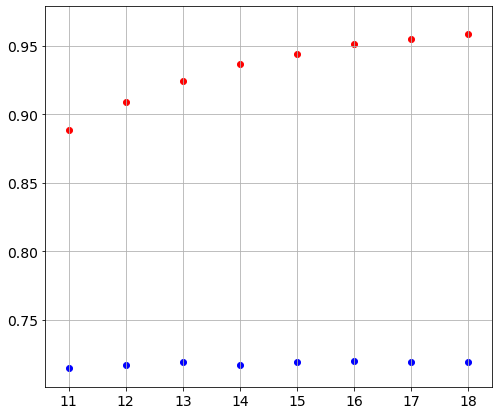

In [60]:
# Прогоняем модель со всеми признаками

rcParams['figure.figsize'] = 8, 7

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Id','Price'], axis = 1) , train['Price'], test_size = 0.25, random_state = 33 )

r2_train = []
r2_test = []
max_depth = list(range(11,19))
for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i, n_estimators=220)
    mod1.fit(X_train,y_train)
    pr_train = mod1.predict(X_train)
    pr_test = mod1.predict(X_test)
    r2_train.append(r2(y_train, pr_train))
    r2_test.append(r2(y_test, pr_test))
    
imp = pd.DataFrame()
imp['name'] = X_train.columns
imp['value'] = mod1.feature_importances_
print(imp.sort_values('value' , ascending = False))
print(r2_test)
plt.scatter(max_depth, r2_train, c ='r')
plt.scatter(max_depth, r2_test, c = 'b')
plt.grid(True)

Видим, что некоторые признаки являеются неважными и, скорее всего, "замусоривают" модель.

             name     value
2          Square  0.397668
9        Social_2  0.115691
8        Social_1  0.084437
1           Rooms  0.078984
10       Social_3  0.068164
0      DistrictId  0.063060
7       Ecology_1  0.047076
6       HouseYear  0.042947
3      LifeSquare  0.039401
5           Floor  0.034139
4   KitchenSquare  0.028434
11   Healthcare_1  0.000000
[0.7161781126728198, 0.7191014980573793, 0.717706158851412, 0.7212703204681478, 0.7207599787732237, 0.7201803856180355, 0.7173113604258072, 0.7215962326275325]


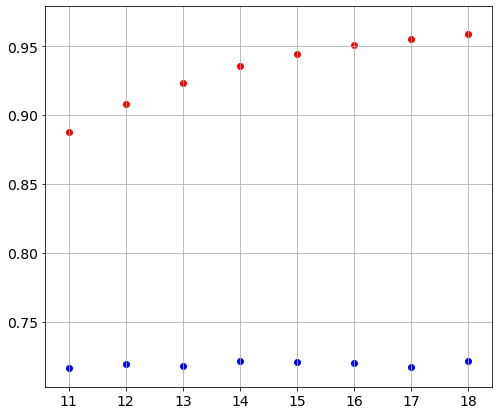

In [61]:
# Прогоняем модель только с важными признаками

rcParams['figure.figsize'] = 8, 7

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Id','Price', 'Ecology_3','HouseFloor','Ecology_2','Shops_1' ,'Shops_2','Helthcare_2'], axis = 1) , train['Price'], test_size = 0.25, random_state = 33 )

r2_train = []
r2_test = []
max_depth = list(range(11,19))
for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i, n_estimators=220)
    mod1.fit(X_train,y_train)
    pr_train = mod1.predict(X_train)
    pr_test = mod1.predict(X_test)
    r2_train.append(r2(y_train, pr_train))
    r2_test.append(r2(y_test, pr_test))
    
imp = pd.DataFrame()
imp['name'] = X_train.columns
imp['value'] = mod1.feature_importances_
print(imp.sort_values('value' , ascending = False))
print(r2_test)
plt.scatter(max_depth, r2_train, c ='r')
plt.scatter(max_depth, r2_test, c = 'b')
plt.grid(True)

In [70]:
# Загружаем данные

data_test = pd.read_csv('test.CSV')
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [72]:
data_test = lifesquare(data_test)

In [73]:
data_test = healthcare_1(data_test)

In [74]:
data_test.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [63]:
# Делаем итоговое предсказание

model = RandomForestRegressor(max_depth=15, n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
# Делаем предсказание
predict = model.predict(data_test.drop(['Id', 'Ecology_3','HouseFloor','Ecology_2','Shops_1' ,'Shops_2','Helthcare_2'], axis = 1))

In [77]:
len(predict)

5000

In [80]:
data_test['Price'] = predict

In [81]:
data_test['Price']

0       164963.476873
1       212895.998883
2       193053.285784
3       378009.622043
4       143337.120240
            ...      
4995    243930.882533
4996    133767.577040
4997    328763.897204
4998    203831.894719
4999    168561.730546
Name: Price, Length: 5000, dtype: float64

In [82]:
data_test[['Id', 'Price']].to_csv('MSeliverstov_predict.csv', index = False)

Результат в kaggle.com - 0.71710